<a href="https://colab.research.google.com/github/SubashKhatiwada11/Data-Science-project900-/blob/main/Project1(Using_ML_algorithm_to_classify_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML ALGORITHMS TO  CLASSIFY DIABETES

##Context

#This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


#We import some significant Python libraries at first.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#LOAD DATA

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info() # Information regarding data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## EDA(Exploratory Data Analysis)

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.Outcome.value_counts()/len(df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

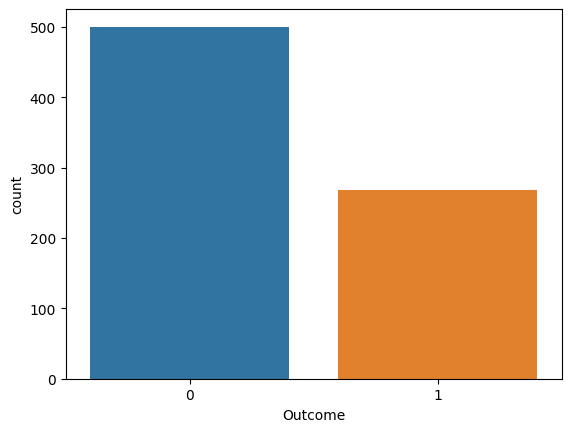

In [ ]:
sns.countplot(data = df , x = "Outcome")


# It is a imbalanced data accuracy,so we should use F1 score.

In [ ]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

<Axes: xlabel='Pregnancies', ylabel='count'>

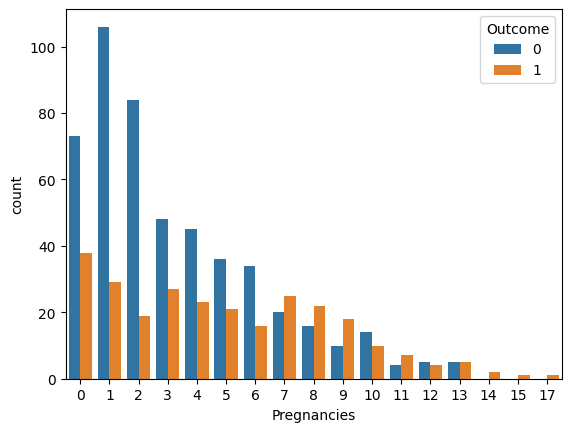

In [ ]:
sns.countplot(data = df , x = "Pregnancies" ,hue = "Outcome")

In [ ]:
# Pregnancies 0-7 shows the Outcome of diabetes quiet more.
# Pregnancies 7-9 shows the Outcome of diabetes compartively less then before.


Therefore there might be a relationship between the Outcome and Pregnancies.
Hence Pregnancies might be a good Predictor Value.

<Axes: xlabel='BMI', ylabel='count'>

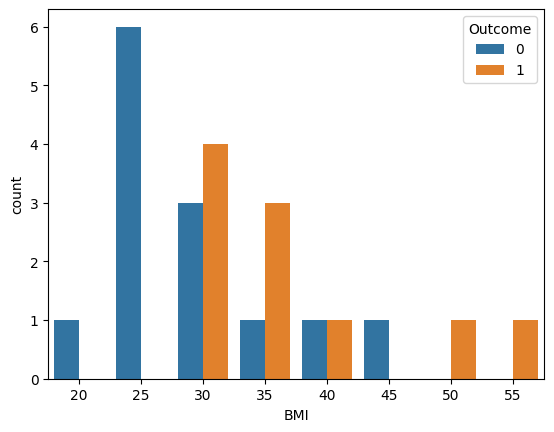

In [ ]:
sns.countplot(data = df , x = "BMI" , hue = "Outcome", order = [20,25,30,35,40,45,50,55])

# BMI with less than 25 have no chance of Outcome(Diabetes),whereas BMI with 30-35 have maximium Outcome(Diabetes).
There might be some relationship between BMI and Outcome(Diabetes).

In [ ]:
# Is there any relationship between  Pregnancies and BMI?
df.groupby("Insulin").Pregnancies.median()



Insulin
0      4.0
14     0.0
15     2.0
16     2.0
18     2.0
      ... 
579    1.0
600    8.0
680    0.0
744    4.0
846    1.0
Name: Pregnancies, Length: 186, dtype: float64

On average Pregnancies 8 have around 600 Insulin and below that are quite random.

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

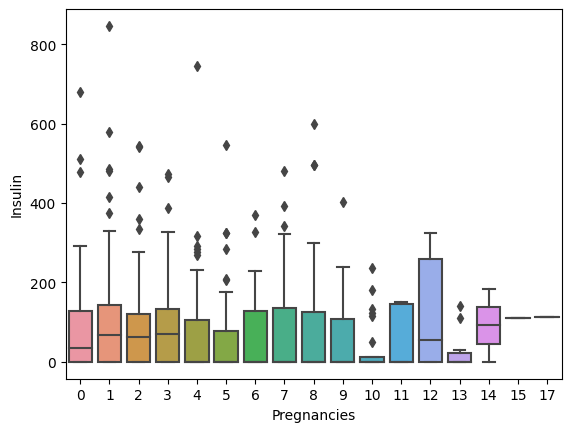

In [ ]:
sns.boxplot(data = df , y = "Insulin" ,x = "Pregnancies")

# Is there any Relationship between SkinThickness and Outcome?

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

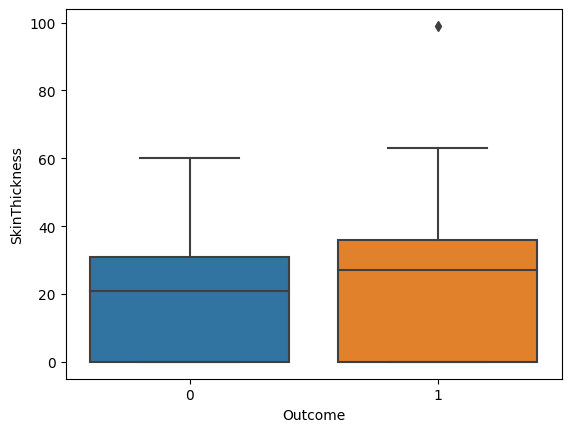

In [ ]:
sns.boxplot(data = df ,x = "Outcome" , y = "SkinThickness")

We check the distribution of SkinThickness.

<Axes: xlabel='SkinThickness', ylabel='Count'>

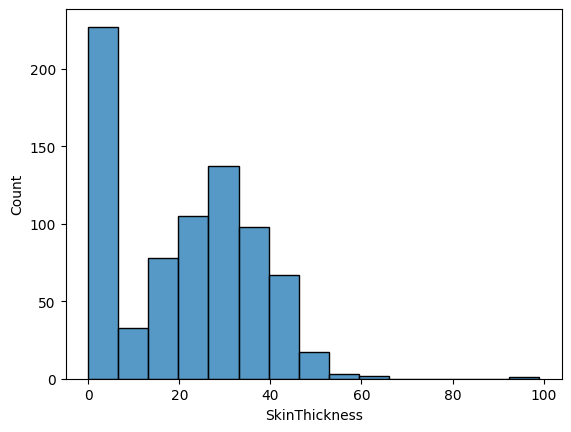

In [ ]:
sns.histplot(df.SkinThickness)

Hence its is Right-skewed distributions.

<Axes: xlabel='SkinThickness', ylabel='Density'>

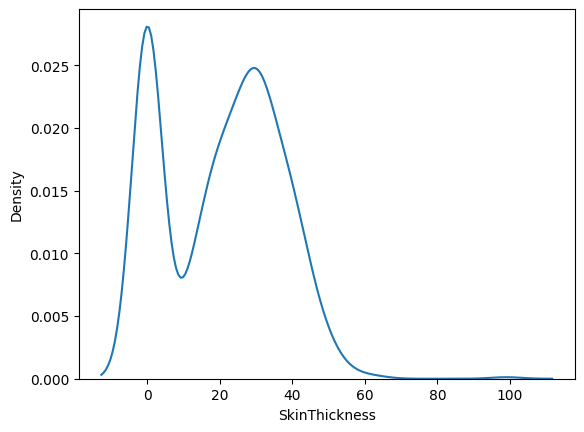

In [ ]:
sns.kdeplot(df.SkinThickness)

## Since there are no missing data and Categorical Data ,we know proceed with the MODELING.

* Declare Feature Variable and Target Variable.

In [ ]:
X= df.drop(["Outcome"], axis =1)
y = df["Outcome"]

##**Splitting Data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Check the Shape of X_train and X_test
X_train.shape ,X_test.shape

((614, 8), (154, 8))

# Logistic Regression

In [ ]:
## train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 5000)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

## EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score, recall_score ,precision_score , f1_score, confusion_matrix

# Confusion Matrix

In [ ]:
cm = confusion_matrix(y_true = y_test , y_pred = y_pred)
cm

array([[78, 21],
       [18, 37]])

# Accuracy

In [ ]:
accuracy = accuracy_score(y_true = y_test , y_pred = y_pred)
accuracy

0.7467532467532467

In [ ]:
# Accuracy of the model is 0.75

In [ ]:
f1Score = f1_score(y_true= y_test, y_pred = y_pred)
f1Score

0.6548672566371682

In [ ]:
precision_score = precision_score(y_true= y_test, y_pred = y_pred)
precision_score

0.6379310344827587

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


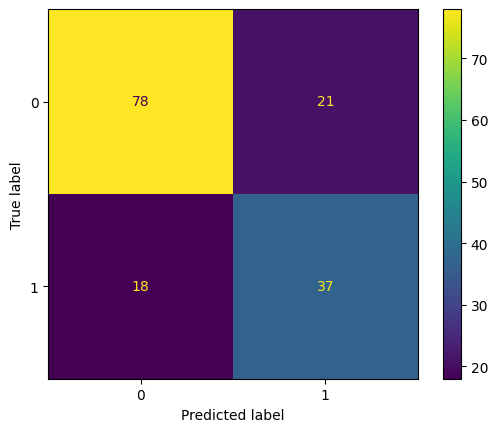

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test , y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

